<a href="https://colab.research.google.com/github/JurijJusel/Image/blob/t5-dir-reader/apple_banana_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries


In [ ]:
import pandas as pd
from operator import itemgetter
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing

In [ ]:
apple_banana_train_path = '/content/drive/MyDrive/Colab Notebooks/dataset/train'

In [ ]:
image_url = []
folder_name=[]
for file_path, folders, files in os.walk(apple_banana_train_path):
  for file in files:
      full_path = os.path.join(file_path, file)
      image_url.append(full_path)
      direct = file_path.split('/')[7:]
      folder_name.append('/'.join(direct))



In [ ]:
folder_name_df = pd.DataFrame(folder_name, columns=['name'])
img_path_df = pd.DataFrame(image_url,columns=['image_path'] )
df = pd.concat([folder_name_df, img_path_df], axis=1)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/apple_banana.csv', index=False)

In [ ]:
apple_banana_df = '/content/drive/MyDrive/Colab Notebooks/apple_banana.csv'

In [ ]:
read_apple_banana_df = pd.read_csv(apple_banana_df)
read_apple_banana_df.info()
# read_apple_banana_df.describe()
# read_apple_banana_df.head()
# read_apple_banana_df.apply(lambda x: x.upper())
# read_apple_banana_df.tail(3)  # paskutiniai 3 eilutes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        143 non-null    object
 1   image_path  143 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [ ]:
read_apple_banana_df['image_path']


In [ ]:
for line in range(len(read_apple_banana_df)):
    line_path=read_apple_banana_df['image_path']


In [ ]:
image_lst=[]
folder_name=[]
for line in line_path:
    # print(line)
    img_path = cv2.imread(line)
    direct = line.split('/')[7:]
    folder_name.append('/'.join(direct))
    img = plt.imread(line)
    gray_img = cv2.cvtColor(img_path, cv2.COLOR_RGB2GRAY)
    img_resized = cv2.resize(gray_img, (122,122))
    img_array = np.array(img_resized)
    image_gray_lst=[item for sublist in img_array for item in sublist]
    image_lst.append(image_gray_lst)
# print(direct)

In [ ]:
img_data_df = pd.DataFrame(image_lst)
name_df = pd.DataFrame(folder_name, columns=['image_name'])
apple_banana_df_grey = pd.concat([img_data_df, name_df], axis=1)
apple_banana_df_grey.to_csv('/content/drive/MyDrive/Colab Notebooks/apple_banana_grey_df.csv', index=False)
       

In [ ]:
apple_banana_grey_df = '/content/drive/MyDrive/Colab Notebooks/apple_banana_grey_df.csv'
read_df = pd.read_csv(apple_banana_grey_df)
# read_df.info()
# read_df.describe()
read_df
# read_df.tail(3)  # paskutiniai 3 eilutes

,0,1,2,3,4,5,6,7,8,9,...,14875,14876,14877,14878,14879,14880,14881,14882,14883,image_name
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,apple/Image_1.jpg
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,apple/Image_31.jpg
2,-122,-121,-123,126,-126,-120,-118,-117,-118,-121,...,-18,-29,-37,-42,-43,-33,-51,-41,-44,apple/Image_19.jpg
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,apple/Image_28.jpg
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,apple/Image_18.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,banana/Image_95.jpg
139,-76,-68,-61,-42,-32,-43,-54,-53,-79,-82,...,-102,-2,-1,-1,-1,-1,-1,-1,-1,banana/Image_92.jpg
140,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,banana/Image_93.jpg
141,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,banana/Image_96.jpg


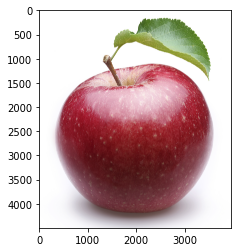

In [ ]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/dataset/train/apple/Image_34.jpg')
plt.imshow(img)